## **Predict New York taxi fare:**
In this playground competition, hosted in partnership with Google Cloud and Coursera, you are tasked with predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While you can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used (see the starter code for an example of this approach in Kernels). Your challenge is to do better than this using Machine Learning techniques!

In [2]:
'''
Here we are installing some required libraries for this task
'''
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (176 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144487 files and directories currently installed.)
Pre

In [1]:
import pandas as pd
import numpy as np
import random
import zipfile
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
'''
Here, i am mounting the drive in order to connect my Google Driver where the data i need is stored
'''
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
'''
Here i am creating a direct path to the data is going to be analysed. I'm also extrating de train and test
data from the zip file.
'''

dataset_path = '/content/drive/My Drive/Colab Notebooks/New York Taxi Fare/new-york-city-taxi-fare-prediction.zip'
zip_object = zipfile.ZipFile(file = dataset_path, mode = "r")
zip_object.extractall('./')
zip_object.close()

In [4]:
'''
First five rows of train.csv file
'''
!head train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

# **Investigating the data**

In [5]:
'''
The database is too big and not enough memory. That means we can't use Pandas to count the quantity of rows. 
Here we are using other method.
'''
number_rows_in_file = sum(1 for line in open('train.csv'))
number_rows_in_file

55423857

**It's more than 55 milions of data. It's too big. We need to select a sample that we can actually use.**

In [6]:
'''
We need a smaller sample to run some tests, and analyze the data. Later we can use the original data to check the results
'''
sample_size = 250000

**We are going to extract 250 thousands rows out of 55 milion rows, randomly**

In [7]:
'''
First row is the head, so we begin from index 1
'''
range(1, number_rows_in_file)

range(1, 55423857)

In [8]:
number_rows_in_file - sample_size

55173857

In [9]:
'''
Those indexes at the variable 'skip_rows' will be ignored in order to extract random 25k rows from the total database
'''
random.seed(24)
skip_rows = sorted(random.sample(range(1, number_rows_in_file + 1),
                                 number_rows_in_file - sample_size))

In [10]:
'''
Now we are gonna take those choosen values and put them in a variable called 'train'
'''
train = pd.read_csv('train.csv', skiprows = skip_rows)


In [11]:
train.shape

(250000, 8)

In [12]:
'''
Here I am creating another dataset containing only the sample that will be worked on. If i need to reset the environment,
i just need to load this smaller sample
'''
train.to_csv('train_sample_' + str(sample_size) + '.csv', index = False)

In [13]:
'''
Now the train variable will receive the smaller data. This will be executed in the first time.
'''
train = pd.read_csv('train_sample_' + str(sample_size) + '.csv',
                    parse_dates = ['key', 'pickup_datetime'],
                    dtype = {'fare_amount': np.float32,
                             'pickup_latitude': np.float32,
                             'pickup_longitude': np.float32,
                             'dropoff_latitude': np.float32,
                             'dropoff_longitude': np.float32,
                             'passenger_count': np.int32             
                    })

In [14]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-06-21 16:15:00.000000730,7.300000,2011-06-21 16:15:00+00:00,-73.991875,40.754436,-73.977226,40.774323,3
1,2009-06-06 23:56:00.000000150,5.700000,2009-06-06 23:56:00+00:00,-73.982353,40.762497,-73.973213,40.755344,2
2,2012-04-25 16:19:00.000000106,5.300000,2012-04-25 16:19:00+00:00,-73.971916,40.759251,-73.962906,40.772160,1
3,2009-09-02 05:18:10.000000100,25.700001,2009-09-02 05:18:10+00:00,-73.991730,40.760502,-73.861244,40.767620,1
4,2011-09-24 22:57:00.000000290,4.100000,2011-09-24 22:57:00+00:00,-74.000687,40.742237,-74.000359,40.735275,2


In [15]:
train.dtypes

key                       datetime64[ns]
fare_amount                      float32
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float32
pickup_latitude                  float32
dropoff_longitude                float32
dropoff_latitude                 float32
passenger_count                    int32
dtype: object

## **Cleaning the data**

In [16]:
train.isna().sum(axis = 0)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

**Analysing the dates**

In [17]:
key = train['key']

In [18]:
key.describe()

count                            250000
unique                           249991
top       2012-03-30 15:32:00.000000200
freq                                  2
first     2009-01-01 00:37:17.000000100
last      2015-06-30 23:59:45.000000100
Name: key, dtype: object

(array([2365., 2610., 2478., 2556., 2571., 2629., 2443., 2412., 2455.,
        2381., 2425., 2616., 2743., 2650., 2575., 2305., 2205., 2404.,
        2342., 2646., 2773., 2567., 2612., 2508., 2245., 2223., 2368.,
        2498., 2772., 2556., 2109., 2503., 2659., 2746., 2517., 2732.,
        2758., 2615., 2546., 2686., 2175., 2564., 2624., 2790., 2596.,
        2570., 2544., 2721., 2785., 2799., 2597., 2747., 2539., 2730.,
        2487., 2478., 2521., 2658., 2420., 2402., 2645., 2269., 2671.,
        2610., 2693., 2665., 2679., 2749., 2475., 2414., 2238., 2260.,
        2466., 2586., 2673., 2478., 2368., 2343., 2526., 2576., 2662.,
        2583., 2686., 2417., 2312., 2348., 2201., 2348., 2405., 2406.,
        2376., 2355., 2066., 2261., 2349., 2308., 2266., 2309., 2252.,
        2155.]),
 array([733408.0258912 , 733431.74563056, 733455.46536991, 733479.18510926,
        733502.90484861, 733526.62458796, 733550.34432731, 733574.06406667,
        733597.78380602, 733621.50354537, 733645.2

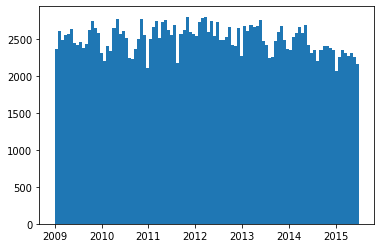

In [19]:
'''
Looking for outliers
'''

plt.hist(key, bins = 100)

In [20]:
pdt = train['pickup_datetime']
pdt.describe()

count                        250000
unique                       244650
top       2013-04-04 20:25:00+00:00
freq                              4
first     2009-01-01 00:37:17+00:00
last      2015-06-30 23:59:45+00:00
Name: pickup_datetime, dtype: object

In [21]:
'''
Let's format the column 'pickup_datetime' so that we can visualize the datetime in a more friendlly way
'''
pdt = pdt.map(lambda date: date.tz_localize(None))

In [96]:
pdt.head()

0   2011-06-21 16:15:00
1   2009-06-06 23:56:00
2   2012-04-25 16:19:00
3   2009-09-02 05:18:10
4   2011-09-24 22:57:00
Name: pickup_datetime, dtype: datetime64[ns]

In [23]:
'''
The same formatting done previously can be done in another way, as shown below.
'''
key = pd.to_datetime(key.dt.strftime('%Y-%m-%d %H:%M:%S'))

In [24]:
key.head()

0   2011-06-21 16:15:00
1   2009-06-06 23:56:00
2   2012-04-25 16:19:00
3   2009-09-02 05:18:10
4   2011-09-24 22:57:00
Name: key, dtype: datetime64[ns]

In [25]:
'''
It seems like the column 'pickup_datetime' has the same values as the column 'key'. Let's check if that's true.
'''
(key == pdt).value_counts()

True    250000
dtype: int64

In [26]:
'''
The columns key and pdt are has the same values. So we are going to drop one of them.
'''
train.drop(['key'], axis = 1, inplace = True)

In [27]:
'''
The comulm 'pickup_datetime is receiving the formatted values from column "pdt"'
'''

train['pickup_datetime'] = pdt

In [28]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.300000,2011-06-21 16:15:00,-73.991875,40.754436,-73.977226,40.774323,3
1,5.700000,2009-06-06 23:56:00,-73.982353,40.762497,-73.973213,40.755344,2
2,5.300000,2012-04-25 16:19:00,-73.971916,40.759251,-73.962906,40.772160,1
3,25.700001,2009-09-02 05:18:10,-73.991730,40.760502,-73.861244,40.767620,1
4,4.100000,2011-09-24 22:57:00,-74.000687,40.742237,-74.000359,40.735275,2


## **Analysing the Coordenates**

**pickup_longitude**

In [29]:
'''
Let's look for some outliers. We can see in the describe below that the maximum and the minimum values are 
inconsistent
'''

plon = train['pickup_longitude']
plon.describe()

count    250000.000000
mean        -72.528488
std          15.740434
min       -3384.713135
25%         -73.992073
50%         -73.981812
75%         -73.967024
max        2889.983887
Name: pickup_longitude, dtype: float64

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 2.45048e+05, 4.82300e+03, 1.20000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

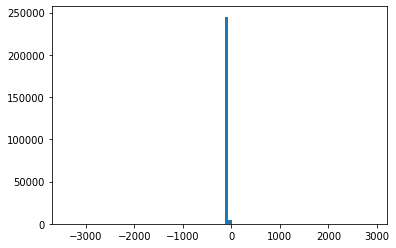

In [30]:
plt.hist(plon, bins = 100)

In [31]:
'''
The median will show the centered value of the distribution
'''
plon.median()

-73.9818115234375

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.0000e+00, 0.0000e+00, 8.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.1000e+01, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        5.0000e+00, 1.0000e+01, 8.0000e+00, 1.6000e+01, 3.5000e+01,
        2.2000e+01, 3.8000e+01, 5.5800e+02, 1.6490e+05, 6.7478e+04,
        2.1440e+03, 5.2700e+03, 3.9200e+02, 3.9510e+03, 3.3000e+01,
        2.1000e+01, 5.0000e+00, 4.0000e+00, 3.0000e+00, 9.0000e+00,
        0.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 7.9000e+01, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

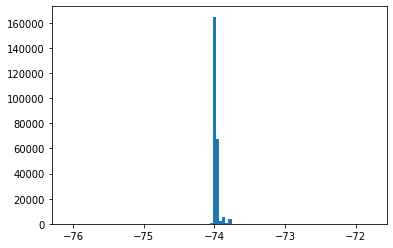

In [32]:
'''
Let's check the values around the median
'''
plt.hist(plon[(plon > plon.median() - 2.5) & (plon < plon.median() + 2.5)], bins = 100)

In [33]:
'''
We don't want inconsistent values in our dataframe. We only want values ​​that are 0.5 distances from the median.
The values that is not under this distance, is inconsistent and it's gonna be removed.
'''

plon_val = (plon > plon.median() - 0.5) & (plon < plon.median() + 0.5)

In [34]:
'''
We have 5095 inconsistent values and they are gonna be removed
'''
plon_val.value_counts()

True     244905
False      5095
Name: pickup_longitude, dtype: int64

In [35]:
'''
We are printing the values normalized.
'''
print(plon_val.value_counts(), '\n', plon_val.value_counts(normalize = True))

True     244905
False      5095
Name: pickup_longitude, dtype: int64 
 True     0.97962
False    0.02038
Name: pickup_longitude, dtype: float64


# **The same operation done before with the 'pickup_longitude' will be done more times for other variables**

**pickup_latitude**


In [36]:
plat = train['pickup_latitude']
plat.describe()

count    250000.000000
mean         39.972263
std           8.903992
min       -2108.157715
25%          40.734966
50%          40.752640
75%          40.767147
max        1978.489990
Name: pickup_latitude, dtype: float64

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.80000e+01, 4.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 1.20000e+01, 0.00000e+00, 1.00000e+00, 3.00000e+00,
        4.00000e+00, 4.00000e+00, 3.00000e+00, 2.00000e+00, 8.00000e+00,
        9.00000e+00, 3.50000e+01, 1.13000e+03, 4.51200e+03, 3.20440e+04,
        1.47045e+05, 5.82880e+04, 1.66800e+03, 1.35000e+02, 2.10000e+01,
        9.00000e+00, 4.00000e+00, 1.10000e+01, 5.00

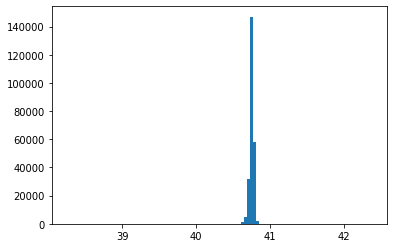

In [37]:
plt.hist(plat[(plat > plat.median() - 2.5) & (plat < plat.median() + 2.5)], bins = 100)

In [38]:
plat_val = (plat > plat.median() - 0.5) & (plat < plat.median() + 0.5)

In [39]:
print(plat_val.value_counts(), '\n', plat_val.value_counts(normalize= True))

True     244945
False      5055
Name: pickup_latitude, dtype: int64 
 True     0.97978
False    0.02022
Name: pickup_latitude, dtype: float64


**dropoff_longitude**

In [40]:
dlon = train['dropoff_longitude']

In [41]:
dlon.describe()

count    250000.000000
mean        -72.546288
std          14.218449
min       -3047.714844
25%         -73.991402
50%         -73.980103
75%         -73.963638
max        2554.397217
Name: dropoff_longitude, dtype: float64

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 4.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.20000e+01, 0.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 3.00000e+00, 5.00000e+00, 4.00000e+00,
        1.40000e+01, 1.10000e+01, 5.50000e+01, 3.38000e+02, 3.00000e+01,
        6.00000e+01, 3.81000e+02, 8.00350e+04, 1.39989e+05, 1.43890e+04,
        3.47100e+03, 3.07700e+03, 8.91000e+02, 1.93100e+03, 1.59000e+02,
        5.10000e+01, 1.80000e+01, 1.00000e+01, 1.20000e+01, 1.00000e+01,
        5.00000e+00, 2.00000e+00, 7.00000e+00, 3.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00

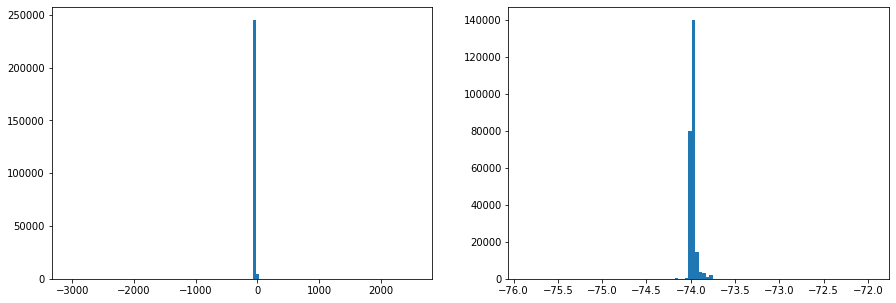

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(dlon, bins = 100)
ax[1].hist(dlon[(dlon > dlon.median() - 2.5) & (dlon < dlon.median() + 2.5)], bins = 100)

In [43]:
dlon_val = (dlon > dlon.median()- 0.5) & (dlon < dlon.median() + 0.5)
print(dlon_val.value_counts(), '\n', dlon_val.value_counts(normalize = True))

True     244950
False      5050
Name: dropoff_longitude, dtype: int64 
 True     0.9798
False    0.0202
Name: dropoff_longitude, dtype: float64


**dropoff_latitude**

In [44]:
dlat = train['dropoff_latitude']
dlat.describe()

count    250000.000000
mean         39.981991
std          10.486096
min       -2450.704834
25%          40.734032
50%          40.753296
75%          40.768162
max        2561.559082
Name: dropoff_latitude, dtype: float64

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.20000e+01, 7.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00,
        1.20000e+01, 1.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        3.00000e+00, 4.00000e+00, 2.00000e+00, 3.00000e+00, 9.00000e+00,
        1.50000e+01, 1.37000e+02, 4.75000e+02, 2.81300e+03, 5.33900e+03,
        2.86410e+04, 1.02682e+05, 9.06040e+04, 1.12760e+04, 2.21000e+03,
        5.63000e+02, 1.19000e+02, 2.50000e+01, 5.00000e+00, 1.10000e+01,
        9.00000e+00, 8.00000e+00, 2.00000e+00, 2.00000e+00, 3.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00

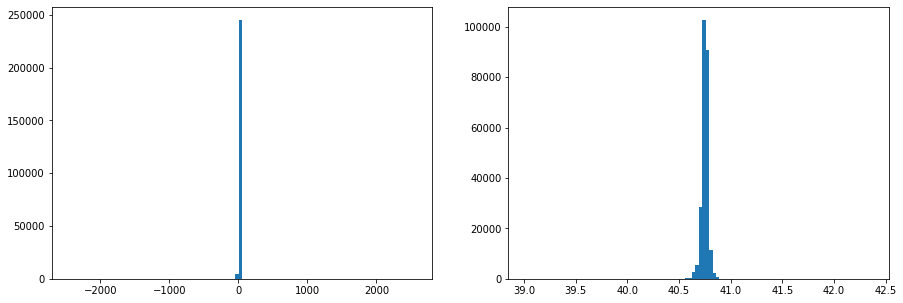

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(dlat, bins = 100)
ax[1].hist(dlat[(dlat > dlat.median() - 2.5) & (dlat < dlat.median() + 2.5)], bins = 100)

In [46]:
dlat_val = (dlat > dlat.median() - 0.5) & (dlat < dlat.median() + 0.5)
print(dlat_val.value_counts(), '\n', dlat_val.value_counts(normalize = True))

True     244964
False      5036
Name: dropoff_latitude, dtype: int64 
 True     0.979856
False    0.020144
Name: dropoff_latitude, dtype: float64


**passenger_count**

In [47]:
'''
We have a maximum of 208 passenger in a car. And that's impossible
'''
pcnt = train['passenger_count']
pcnt.describe()

count    250000.000000
mean          1.688128
std           1.375412
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [48]:
'''
How many zero passengers we have? Let's find out. 
We have 861 passangers == 0 that represents 0.00344 of entire dataframe ( with 250000 rows)
'''
print((pcnt == 0).sum(), (pcnt == 0).mean())

861 0.003444


(array([2.10511e+05, 1.63390e+04, 2.31490e+04, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

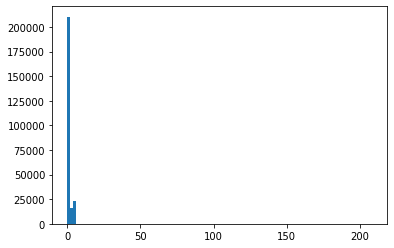

In [49]:
plt.hist(pcnt, bins = 100)

(array([   861.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 172964.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  36686.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,  11001.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,   5338.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,  17761.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

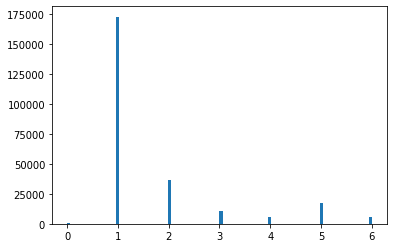

In [50]:
'''
Plotting the histogram with a number of passengers less than 20, we can see that most the number os 
passengers revolves around 6 passengers.
'''
plt.hist(pcnt[pcnt < 20], bins = 100)

In [51]:
'''
Any number of passengers below 1 and above 6 is inconsistent. We are going to remove those inconsistences.
'''
pcnt_val = (pcnt >= 1) & (pcnt <=6)
print(pcnt_val.value_counts(), '\n', pcnt_val.value_counts(normalize = True))

True     249138
False       862
Name: passenger_count, dtype: int64 
 True     0.996552
False    0.003448
Name: passenger_count, dtype: float64


**fare_amount**

In [52]:
'''
We can see some inconsistencies below. Negative values and a very maximum expensive value (400 dollars) are shown below.
'''
fare = train['fare_amount']
fare.describe()

count    250000.000000
mean         11.328001
std           9.699137
min          -7.700000
25%           6.000000
50%           8.500000
75%          12.500000
max         400.000000
Name: fare_amount, dtype: float64

(array([4.00000e+00, 1.20000e+01, 2.72480e+04, 1.04666e+05, 5.64860e+04,
        2.52810e+04, 1.20500e+04, 6.25600e+03, 4.32400e+03, 3.49100e+03,
        2.25300e+03, 1.35600e+03, 1.46500e+03, 5.88000e+02, 2.09200e+03,
        1.50500e+03, 3.17000e+02, 1.23000e+02, 9.00000e+01, 6.10000e+01,
        5.30000e+01, 6.10000e+01, 4.40000e+01, 3.30000e+01, 2.10000e+01,
        1.70000e+01, 1.90000e+01, 1.10000e+01, 8.00000e+00, 8.00000e+00,
        7.00000e+00, 7.00000e+00, 4.00000e+00, 4.00000e+00, 4.00000e+00,
        4.00000e+00, 4.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00,
        1.00000e+00, 3.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00

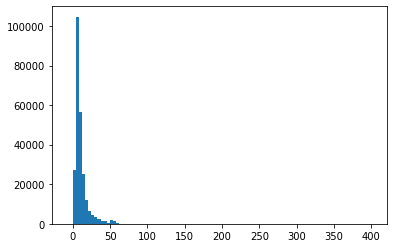

In [53]:
plt.hist(fare, bins = 100)

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 9.9500e+02, 2.0000e+00, 6.0400e+02,
        4.6900e+02, 0.0000e+00, 1.8760e+03, 1.3010e+03, 3.7130e+03,
        3.0000e+01, 7.9620e+03, 6.0000e+01, 1.0234e+04, 6.3000e+01,
        3.0000e+01, 1.1645e+04, 2.7000e+01, 7.25

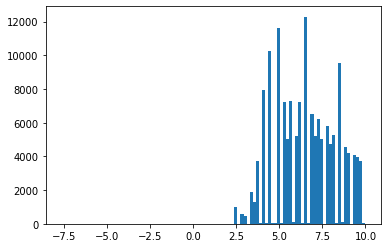

In [54]:
'''
Most of fare values are above 2.5 dollars.
'''
plt.hist(fare[fare < 10], bins = 100)

(array([7.150e+02, 4.060e+02, 1.385e+03, 9.600e+01, 1.030e+02, 6.600e+01,
        4.400e+01, 4.600e+01, 5.700e+01, 3.400e+01, 3.200e+01, 2.500e+01,
        1.100e+01, 1.400e+01, 2.000e+01, 8.000e+00, 9.000e+00, 7.000e+00,
        6.000e+00, 7.000e+00, 5.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        4.000e+00, 5.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

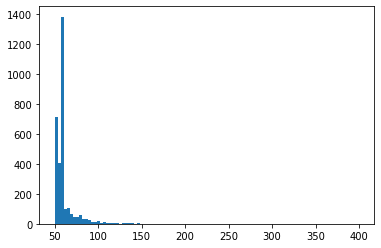

In [55]:
'''
Most of fare values are below 150 dollars.
'''
plt.hist(fare[fare > 50], bins = 100)

In [56]:
'''
We will choose fare values between 2 and 150 dollars. We have only 37 fare values outside those values
'''
fare_val = (fare > 2) & (fare < 150)
print(fare_val.value_counts(), '\n', fare_val.value_counts(normalize = True))

True     249963
False        37
Name: fare_amount, dtype: int64 
 True     0.999852
False    0.000148
Name: fare_amount, dtype: float64


## **Uniting all the variables**

After creating the variables with the conditions limits, we have to unite all the variables into a single variable. That's been done right below.

In [57]:
val_entries = fare_val & plon_val & plat_val & dlon_val & dlat_val & pcnt_val

In [58]:
'''
We have only 2.5% of our database with undesired values. This is small if you compare with the whole database, 
so we can just delete them. 
'''
print(val_entries.value_counts(), '\n', val_entries.value_counts(normalize= True))

True     243718
False      6282
dtype: int64 
 True     0.974872
False    0.025128
dtype: float64


In [59]:
train = train.drop(val_entries[val_entries == False].index)

In [60]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.300000,2011-06-21 16:15:00,-73.991875,40.754436,-73.977226,40.774323,3
1,5.700000,2009-06-06 23:56:00,-73.982353,40.762497,-73.973213,40.755344,2
2,5.300000,2012-04-25 16:19:00,-73.971916,40.759251,-73.962906,40.772160,1
3,25.700001,2009-09-02 05:18:10,-73.991730,40.760502,-73.861244,40.767620,1
4,4.100000,2011-09-24 22:57:00,-74.000687,40.742237,-74.000359,40.735275,2


In [61]:
train.shape

(243718, 7)

## **Feature Engineering**


The two most important factors in predicting the value of the taxi fare are the distance and the duration of taxi ride. We don't have those features. So we need to create them.

**Duration**

The duration of the trip is not given and we cannot calculate because the arrival time is not given. That makes sense
because the intention of the model is to predict the fare before the taxi ride happens.

Something that influences the duration of the ride is the traffic condition. We can deduct using 'pickup_datetime'.


*   time of day: traffic will be less intense overnight
*   day of the week: traffic will be less intense on weekends
*   day of the year: referrals and vacations, for example
*   year: may be influenced by changes in transport rules or inflation






In [62]:
'''
We are creating a variable called 'hour_of_day'.
'''
train['hour_of_day'] = train['pickup_datetime'].map(lambda date: date.timetuple().tm_hour)

In [63]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day
0,7.300000,2011-06-21 16:15:00,-73.991875,40.754436,-73.977226,40.774323,3,16
1,5.700000,2009-06-06 23:56:00,-73.982353,40.762497,-73.973213,40.755344,2,23
2,5.300000,2012-04-25 16:19:00,-73.971916,40.759251,-73.962906,40.772160,1,16
3,25.700001,2009-09-02 05:18:10,-73.991730,40.760502,-73.861244,40.767620,1,5
4,4.100000,2011-09-24 22:57:00,-74.000687,40.742237,-74.000359,40.735275,2,22


In [64]:
'''
We are gonna create other features so that we can analyse the taxi rides through the time
'''
train['day_of_week'] = train['pickup_datetime'].map(lambda date: date.timetuple().tm_wday)
train['day_of_year'] = train['pickup_datetime'].map(lambda date: date.timetuple().tm_yday)
train['year'] = train['pickup_datetime'].map(lambda date: date.timetuple().tm_year)

In [65]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,year
0,7.300000,2011-06-21 16:15:00,-73.991875,40.754436,-73.977226,40.774323,3,16,1,172,2011
1,5.700000,2009-06-06 23:56:00,-73.982353,40.762497,-73.973213,40.755344,2,23,5,157,2009
2,5.300000,2012-04-25 16:19:00,-73.971916,40.759251,-73.962906,40.772160,1,16,2,116,2012
3,25.700001,2009-09-02 05:18:10,-73.991730,40.760502,-73.861244,40.767620,1,5,2,245,2009
4,4.100000,2011-09-24 22:57:00,-74.000687,40.742237,-74.000359,40.735275,2,22,5,267,2011


In [66]:
'''
We need to take care of leap year that has 366 days in a year. These years happen each 4 years. In a leap year
we have the day 02/29 wich we don't have in common years. This might cause some trouble in the prediction.
We are counting how many of these days we have. 
'''
len(train['pickup_datetime'][train['pickup_datetime'].dt.strftime('%m-%d') == '02-29'])

117

In [67]:
'''
We have only a few of rows with the day == 02-29, if you compare with the whole dataset. So we are just 
gonna delete the rows with that condition.
'''
train.drop(train['pickup_datetime'][train['pickup_datetime'].dt.strftime('%m-%d') == '02-29'].index,
           inplace = True)


We removed the rows whose day = 02-29. Now we need to adjust the years where these removals took place, or else the holidays and weekdays will be wrong.

In [68]:
'''
Only the year 2012 was affected by the previous change in that dataset. So we are just gonna work with that year.
We need only work days after the 59° day. Because only these days were affected with the previous removal.
'''
condition = (train['year'] == 2012) & (train['day_of_year'] > 59)
train['day_of_year'][condition] = train['day_of_year'] - 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,year
0,7.300000,2011-06-21 16:15:00,-73.991875,40.754436,-73.977226,40.774323,3,16,1,172,2011
1,5.700000,2009-06-06 23:56:00,-73.982353,40.762497,-73.973213,40.755344,2,23,5,157,2009
2,5.300000,2012-04-25 16:19:00,-73.971916,40.759251,-73.962906,40.772160,1,16,2,115,2012
3,25.700001,2009-09-02 05:18:10,-73.991730,40.760502,-73.861244,40.767620,1,5,2,245,2009
4,4.100000,2011-09-24 22:57:00,-74.000687,40.742237,-74.000359,40.735275,2,22,5,267,2011


Now we are gonna make an association with the variables we have just created (hour_of_day, day_of_week, day_of_year, year) in order to try to describe the vehicle traffic in that period of time.

Text(0.5, 1.0, 'Year')

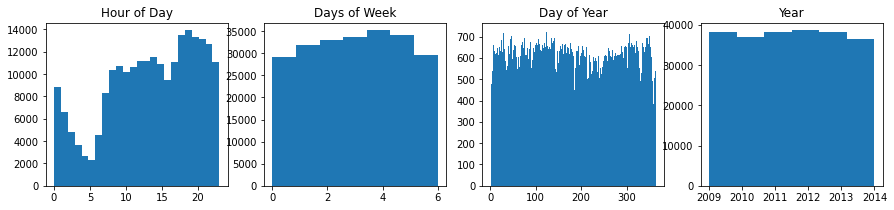

In [70]:
'''
We will have 4 graphics to compare and make some pre-analysis
We don't have the data from 2015 because we have data only until the half of the year in 2015
The graphics are from 2009 until 2014
'''
fig, ax = plt.subplots(1, 4, figsize = (15, 3))
train_not_2015 = train[train['year'] < 2015]
ax[0].hist(train_not_2015['hour_of_day'], bins = 24)
ax[0].set_title('Hour of Day')

ax[1].hist(train_not_2015['day_of_week'], bins = 7)
ax[1].set_title('Days of Week')

ax[2].hist(train_not_2015['day_of_year'], bins = 365)
ax[2].set_title('Day of Year')

ax[3].hist(train_not_2015['year'], bins = 6)
ax[3].set_title('Year')

## **Now we are going to look for correlations between the variables**

###**Correlations between 'pickup_datetime' and demanda**

> **Demanda** is the quantity of taxi rides. Meaning, 'demanda' is the number of registers in the database.




(array([2322., 2557., 2436., 2505., 2528., 2580., 2406., 2394., 2435.,
        2344., 2397., 2591., 2712., 2605., 2534., 2272., 2161., 2348.,
        2285., 2582., 2704., 2513., 2546., 2444., 2177., 2166., 2310.,
        2452., 2701., 2492., 2056., 2426., 2533., 2621., 2431., 2620.,
        2661., 2532., 2436., 2585., 2096., 2441., 2513., 2671., 2501.,
        2462., 2431., 2590., 2547., 2669., 2475., 2646., 2478., 2660.,
        2410., 2419., 2446., 2598., 2366., 2351., 2588., 2228., 2621.,
        2554., 2629., 2616., 2644., 2574., 2425., 2363., 2196., 2238.,
        2451., 2552., 2629., 2419., 2332., 2308., 2492., 2541., 2615.,
        2516., 2623., 2355., 2224., 2299., 2139., 2292., 2357., 2366.,
        2334., 2314., 2020., 2222., 2287., 2253., 2215., 2267., 2219.,
        2114.]),
 array([733408.0258912 , 733431.74563056, 733455.46536991, 733479.18510926,
        733502.90484861, 733526.62458796, 733550.34432731, 733574.06406667,
        733597.78380602, 733621.50354537, 733645.2

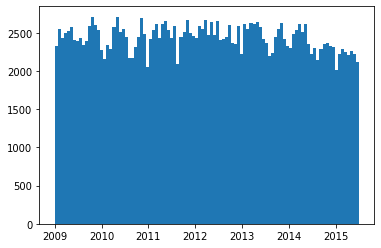

In [71]:
'''
According with the graphic below, there is not so much correlation between pickup_datetime and the number of taxi rides.
'''
plt.hist(train['pickup_datetime'], bins = 100)

**Correlations between 'pickup_datetime' and taxi fare**

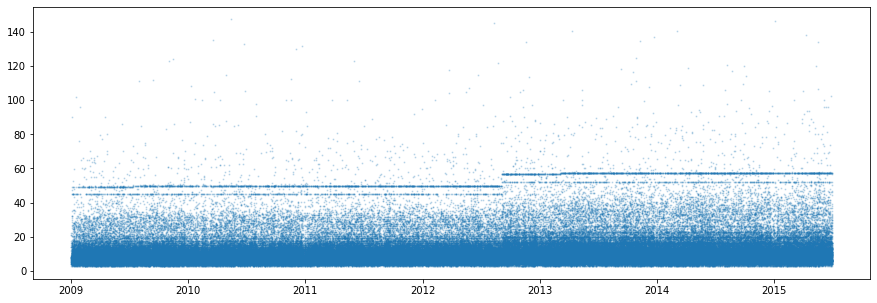

In [72]:
'''
In the scatter method, s is the size of the dots and alpha is the color.
In the x axis we have the date and in the y axis, we have the fare
'''
plt.figure(figsize= (15, 5))
plt.scatter(train['pickup_datetime'], train['fare_amount'], s = 1, alpha = 0.2)

As we can see from the scatter plot above, some line in the graphic suggest that there are fixed values (or most common values) for the fare in most of time. We are gonna analyse that properlly

In [73]:
'''
The most common range of values comes from 40 to 60. Now we are going to grab the most common values and count them
using the Counter method.
'''

from collections import Counter
fare_zoom = train['fare_amount'][(train['fare_amount'] > 40) & (train['fare_amount'] < 60)]

In [74]:
fare_zoom.shape

(5993,)

In [75]:
common_fare_zoom = Counter(fare_zoom)

In [76]:
common_fare_zoom

Counter({40.040000915527344: 7,
         40.099998474121094: 18,
         40.25: 1,
         40.27000045776367: 6,
         40.29999923706055: 9,
         40.33000183105469: 41,
         40.400001525878906: 1,
         40.5: 74,
         40.540000915527344: 5,
         40.650001525878906: 2,
         40.66999816894531: 3,
         40.70000076293945: 1,
         40.7599983215332: 1,
         40.79999923706055: 6,
         40.83000183105469: 47,
         40.900001525878906: 24,
         40.939998626708984: 1,
         41.0: 35,
         41.040000915527344: 7,
         41.04999923706055: 1,
         41.06999969482422: 3,
         41.29999923706055: 31,
         41.33000183105469: 27,
         41.400001525878906: 1,
         41.470001220703125: 4,
         41.5: 37,
         41.540000915527344: 7,
         41.599998474121094: 3,
         41.70000076293945: 24,
         41.79999923706055: 7,
         41.83000183105469: 45,
         41.849998474121094: 1,
         41.869998931884766: 5,
    

In [77]:
'''
Here we are taking the 10 most common fare values
'''
most_common_fare_zoom = common_fare_zoom.most_common(10)

In [97]:
most_common_fare_zoom

[(57.33000183105469, 1059),
 (49.79999923706055, 732),
 (45.0, 673),
 (49.56999969482422, 498),
 (52.0, 415),
 (56.79999923706055, 231),
 (57.540000915527344, 163),
 (49.150001525878906, 142),
 (40.5, 74),
 (50.5, 62)]

<BarContainer object of 10 artists>

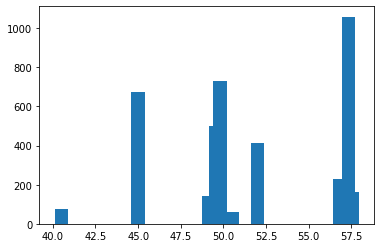

In [79]:
'''
Here we have the plot from the most_common_fare_zoom calculated right before.
'''
plt.bar([x[0] for x in most_common_fare_zoom], [x[1] for x in most_common_fare_zoom])

**Here we are gonna keep exploring the fixed taxi rides, in order to find a correlation with the fare amount**

In [80]:
from mpl_toolkits.basemap import Basemap

## **New York City latitude and longitude definition**

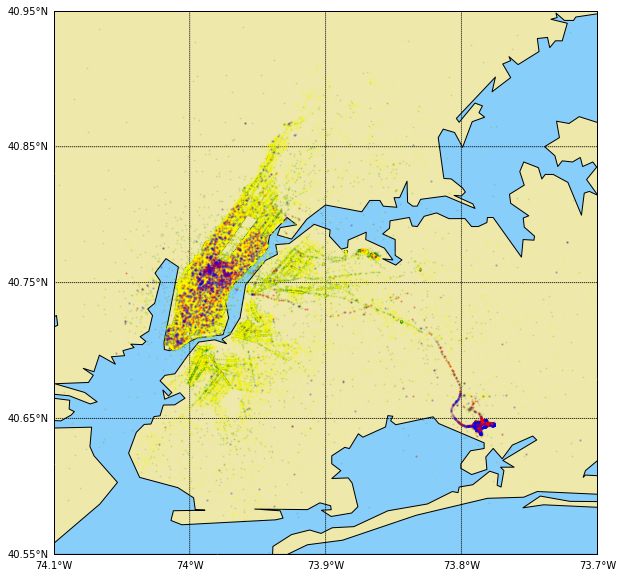

In [81]:
lat1, lat2 = 40.55, 40.95
lon1, lon2 = -74.10, -73.70

plt.figure(figsize = (10, 10))

#Map coverage area
m = Basemap(projection = 'cyl', resolution = 'h',
            llcrnrlat = lat1, urcrnrlat = lat2,
            llcrnrlon = lon1, urcrnrlon = lon2)

#Drawing the maps
m.drawcoastlines()
m.fillcontinents(color = 'palegoldenrod', lake_color = 'lightskyblue')
m.drawmapboundary(fill_color = 'lightskyblue')
m.drawparallels(np.arange(lat1, lat2 + 0.05, 0.1), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(lon1, lon2 + 0.05, 0.1), labels = [0, 0, 0, 1])

# Pickup locations - all exits (green)
m.scatter(train['pickup_longitude'], train['pickup_latitude'], s = 1, c = 'green',
          alpha = 0.1, zorder = 5)
# Dropoof locations - all exits (yellow)
m.scatter(train['dropoff_longitude'], train['dropoff_latitude'], s = 1, c='yellow',
         alpha = 0.1, zorder = 5)

for i in [0, 1, 2, 4]:
  this_fare = most_common_fare_zoom[i][0]
  this_df = train[train['fare_amount'] == this_fare]
  # pickup location - red
  m.scatter(this_df['pickup_longitude'], this_df['pickup_latitude'], s = 2, c = 'red',
           alpha = 0.2, zorder = 5)
  # dropoff location - blue
  m.scatter(this_df['dropoff_longitude'], this_df['dropoff_latitude'], s = 2, c = 'blue',
           alpha = 0.2, zorder = 5)
  

**As we can see from the graphics above is that we have 2 common agreggation places. We wanna know what are these places.**

In [82]:
coords = train[['dropoff_latitude',
                'dropoff_longitude']][(train['fare_amount'] > 40) &
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.7) &
                                       (train['dropoff_latitude'] > 40.6) &
                                       (train['dropoff_longitude'] < -73.7) &
                                       (train['dropoff_longitude'] > -73.9)]

In [83]:
coords.shape

(1612, 2)

In [84]:
coords.head()

,dropoff_latitude,dropoff_longitude
140,40.643787,-73.783150
187,40.643696,-73.783447
300,40.644257,-73.782288
321,40.648746,-73.782425
756,40.648785,-73.782310


In [85]:
'''
If you put those coordenates in the Google Maps, you will discover that they belong to the New York International Airport
'''
print(coords['dropoff_latitude'].median(), coords['dropoff_longitude'].median())

40.645118713378906 -73.78643798828125


In [86]:
coords = train[['dropoff_latitude',
                'dropoff_longitude']][(train['fare_amount'] > 40) &
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.85) &
                                       (train['dropoff_latitude'] > 40.7) &
                                       (train['dropoff_longitude'] < -73.9) &
                                       (train['dropoff_longitude'] > -74.1)]

In [87]:
'''
If you put those coordenates in the Google Maps, you will discover that they belong to the downtown in Manhattam
'''
print(coords['dropoff_latitude'].median(), coords['dropoff_longitude'].median())

40.755348205566406 -73.98301696777344


**Correlation between the fare and the number of passengers**

Now we want to look between the correlation between the fare and the number os passengers. That's what i am doing down below.

In [88]:
filtered = train[['fare_amount', 
                  'passenger_count']][((train['fare_amount'] == most_common_fare_zoom[0][0]) |
                                       (train['fare_amount'] == most_common_fare_zoom[1][0]) |
                                       (train['fare_amount'] == most_common_fare_zoom[2][0]) |
                                       (train['fare_amount'] == most_common_fare_zoom[4][0]))&
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.7) & 
                                       (train['dropoff_latitude'] > 40.6) & 
                                       (train['dropoff_longitude'] < -73.7) &
                                       (train['dropoff_longitude'] > -73.9)]

In [89]:
filtered.shape

(1109, 2)

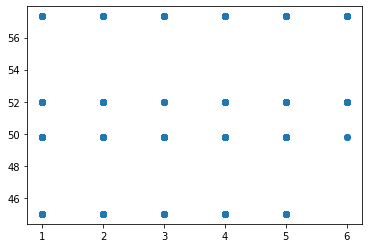

In [90]:
'''
As shown in the graphics down below, we have the same fare regardless of the number of passengers. Because of that, we 
can't find a good correlation between the fare and the number of passengers.
'''
plt.scatter(filtered['passenger_count'], filtered['fare_amount'])

**Correlation between the fare and the hour of day, the day of the week and day of the year**

In [91]:
filtered = train[['fare_amount', 
                  'hour_of_day',
                  'day_of_week',
                  'day_of_year']][((train['fare_amount'] == most_common_fare_zoom[0][0]) |
                                       (train['fare_amount'] == most_common_fare_zoom[1][0]) |
                                       (train['fare_amount'] == most_common_fare_zoom[2][0]) |
                                       (train['fare_amount'] == most_common_fare_zoom[4][0]))&
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.7) & 
                                       (train['dropoff_latitude'] > 40.6) & 
                                       (train['dropoff_longitude'] < -73.7) &
                                       (train['dropoff_longitude'] > -73.9)]

In [92]:
filtered.shape

(1109, 4)

Text(0.5, 1.0, 'Day of year')

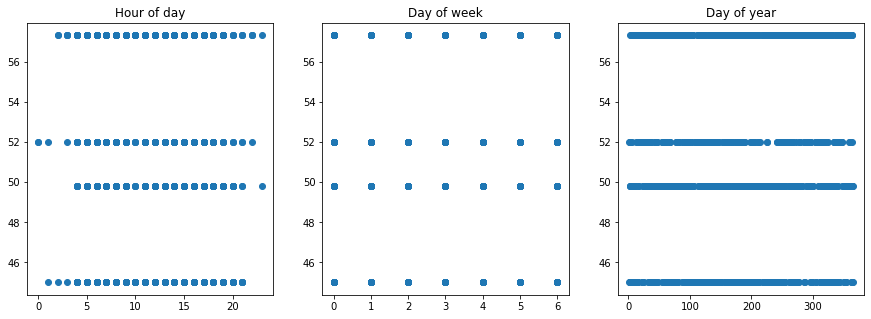

In [93]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].scatter(filtered['hour_of_day'], filtered['fare_amount'])
ax[0].set_title('Hour of day')
ax[1].scatter(filtered['day_of_week'], filtered['fare_amount'])
ax[1].set_title('Day of week')
ax[2].scatter(filtered['day_of_year'], filtered['fare_amount'])
ax[2].set_title('Day of year')

**Like before, there is no correlation between fare and the time period of taxi ride. The fixed value is correlated with the places where the taxi ride takes place and not the period of time.**



In [94]:
'''
The 'pickup_datetime' is not necessary because we already have created other time period variables 
that originated from it. So we are gonna just drop it.
'''

train.drop('pickup_datetime', axis = 1, inplace = True)

In [100]:
train.head(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,year
0,7.3,-73.991875,40.754436,-73.977226,40.774323,3,16,1,172,2011
1,5.7,-73.982353,40.762497,-73.973213,40.755344,2,23,5,157,2009


###**Distance correlations**

In [101]:
'''
We are gonna calculate the distance in radians. That's because we are calculating in a spherical surface.
'''
lon1, lon2 = np.radians(train['pickup_longitude']), np.radians(train['dropoff_longitude'])

In [102]:
lon1

0        -1.291402
1        -1.291236
2        -1.291054
3        -1.291399
4        -1.291556
            ...   
249995   -1.291295
249996   -1.291283
249997   -1.291392
249998   -1.291099
249999   -1.291158
Name: pickup_longitude, Length: 243601, dtype: float32

In [103]:
lat1, lat2 = np.radians(train['pickup_latitude']), np.radians(train['dropoff_latitude'])

In [106]:
lat1

0         0.711299
1         0.711440
2         0.711383
3         0.711405
4         0.711086
            ...   
249995    0.710685
249996    0.710984
249997    0.710649
249998    0.711435
249999    0.711458
Name: pickup_latitude, Length: 243601, dtype: float32

In [105]:
'''
To calculate the distance d, we need to subtract the dropoff point to the pickup point
'''
dlon = lon2 - lon1
dlat = lat2 - lat1

In order to find the real distance between 2 points of a sphere (like the Earth), we need to use a mathematical function called Haversine:
https://en.wikipedia.org/wiki/Haversine_formula

**Euclidian Distance (Km)**

In [107]:
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
train['eucl_distance'] = 6373 * c

**Manhattan Distance (Km)**

In [109]:
a1 = np.sin(dlon / 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
a2 = np.sin(dlat / 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
train['manh_distance'] = 6373 * (c1 + c2)

In [110]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,year,eucl_distance,manh_distance
0,7.300000,-73.991875,40.754436,-73.977226,40.774323,3,16,1,172,2011,2.532987,3.841528
1,5.700000,-73.982353,40.762497,-73.973213,40.755344,2,23,5,157,2009,1.107720,1.813074
2,5.300000,-73.971916,40.759251,-73.962906,40.772160,1,16,2,115,2012,1.624382,2.438704
3,25.700001,-73.991730,40.760502,-73.861244,40.767620,1,5,2,245,2009,11.021216,15.305335
4,4.100000,-74.000687,40.742237,-74.000359,40.735275,2,22,5,267,2011,0.774648,0.810622



Now we will see how the Euclidean distance and Manhattan distance data are distributed.

Text(0.5, 1.0, 'Manhattan Distance')

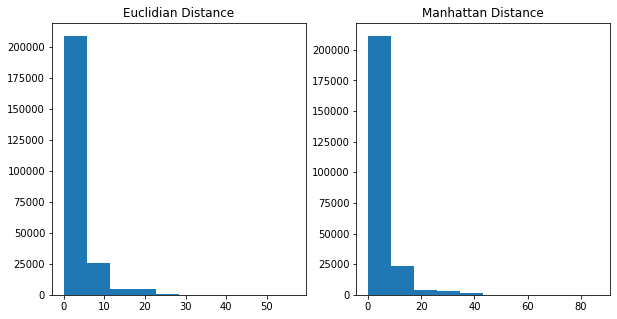

In [111]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].hist(train['eucl_distance'])
ax[0].set_title('Euclidian Distance')
ax[1].hist(train['manh_distance'])
ax[1].set_title('Manhattan Distance')

#**Pre-processing**

In [112]:
X_train = train.drop('fare_amount', axis = 1)
y_train = train['fare_amount']

In [113]:
X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,year,eucl_distance,manh_distance
0,-73.991875,40.754436,-73.977226,40.774323,3,16,1,172,2011,2.532987,3.841528
1,-73.982353,40.762497,-73.973213,40.755344,2,23,5,157,2009,1.107720,1.813074
2,-73.971916,40.759251,-73.962906,40.772160,1,16,2,115,2012,1.624382,2.438704
3,-73.991730,40.760502,-73.861244,40.767620,1,5,2,245,2009,11.021216,15.305335
4,-74.000687,40.742237,-74.000359,40.735275,2,22,5,267,2011,0.774648,0.810622


In [114]:
y_train.head()

0     7.300000
1     5.700000
2     5.300000
3    25.700001
4     4.100000
Name: fare_amount, dtype: float32

**We'll need to normalize the whole dataset between 0 and 1. Otherwise, it will take a lot of time to train the dataset**

In [115]:
'''
Here we are normalizing the data
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [116]:
X_train_scaled

array([[0.46909902, 0.53244966, 0.48130494, ..., 0.33333333, 0.04465228,
        0.04432241],
       [0.47960274, 0.54129062, 0.48569592, ..., 0.        , 0.01952724,
        0.0209187 ],
       [0.49111644, 0.53772997, 0.4969739 , ..., 0.5       , 0.0286351 ,
        0.02813704],
       ...,
       [0.46973025, 0.49159209, 0.46574451, ..., 0.5       , 0.01310639,
        0.00876105],
       [0.48822118, 0.5410061 , 0.46955113, ..., 0.66666667, 0.03251048,
        0.03403618],
       [0.48453478, 0.54244543, 0.48481105, ..., 0.83333333, 0.04036586,
        0.03110414]])

#**Training**

In [117]:
#Cross validation to prevent overfitting
from sklearn.model_selection import cross_val_score
cv = 3

#The metric we are going to use
scoring = 'neg_mean_squared_error'

#Count the number of CPUs we have
import multiprocessing
n_jobs = multiprocessing.cpu_count() - 1

In [122]:
n_jobs

1

###**Now we are going to work with some algorithms**

**Linear Progression**

In [124]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

4.544562517699698

As we can see above, our squared error is already less than the previouslly calculated squared error (between 5 and 8). But we will keep looking for better results down below.

**Ridge Regression**

In [126]:
from sklearn.linear_model import Ridge
model = Ridge()
scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

4.544908581344033

**Lasso Regression**

In [127]:
from sklearn.linear_model import Lasso
model = Lasso()
scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

9.497971897486826

**Nearest Neighbors (KNN)**

Instance based algorithm

In [128]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

5.028889040907392

**Decision Tree**

In [129]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

5.2190106452219425

**Random Forest**

In [130]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

3.6721288100004426

**Gradient Boosting**

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

3.801042824009698

**Deep Learning**

In [133]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


4.205800702039588

###**The best performance were with the Gradient Booster and the Random Forest algorithms. I wanna try a new algorithm rather than use the Random Forest again, so i am gonna use the Gradient Booster**

#**Inspecting the best model**

**Dividing the database**

In [134]:
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train1, y_test = train_test_split(X_train_scaled, y_train,
                                                      test_size = 0.2, random_state = 24)

In [135]:
X_train1.shape

(194880, 11)

In [136]:
X_test.shape

(48721, 11)

**Training the model**

In [137]:
model = GradientBoostingRegressor()
model.fit(X_train1, y_train1)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

**Inspecting the model**

In [138]:
'''
We want to know the importance of each feature 
'''
feature_importances = model.feature_importances_

In [139]:
'''
The bigger his value, more important the feature is.
'''
feature_importances

array([1.62904662e-02, 1.50691646e-03, 3.83742822e-02, 8.95929038e-03,
       1.89670671e-04, 3.67087855e-03, 4.64382547e-04, 1.34847857e-03,
       2.49167397e-02, 8.58909014e-01, 4.53698807e-02])

In [140]:
'''
Here we are calculating the order of importance
'''
argsort = np.argsort(feature_importances)

In [141]:
'''
The smaller value in this array is in position 4 of the "feature_importences". The second smaller value is in 
the sisth position of the "feature_importences". The third smaller value is in the seventh position of "feature_importences", 
and so on. 
'''
argsort

array([ 4,  6,  7,  1,  5,  3,  0,  8,  2, 10,  9])

**We wanna know wich feature is more important. So we are going to turn the argsort array into names of features**

In [142]:
feature_importances_sorted = feature_importances[argsort]

In [143]:
feature_importances_sorted

array([1.89670671e-04, 4.64382547e-04, 1.34847857e-03, 1.50691646e-03,
       3.67087855e-03, 8.95929038e-03, 1.62904662e-02, 2.49167397e-02,
       3.83742822e-02, 4.53698807e-02, 8.58909014e-01])

In [144]:
feature_names = X_train.columns

In [145]:
feature_names

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour_of_day', 'day_of_week',
       'day_of_year', 'year', 'eucl_distance', 'manh_distance'],
      dtype='object')

In [146]:
features_sorted = feature_names[argsort]

In [147]:
features_sorted

Index(['passenger_count', 'day_of_week', 'day_of_year', 'pickup_latitude',
       'hour_of_day', 'dropoff_latitude', 'pickup_longitude', 'year',
       'dropoff_longitude', 'manh_distance', 'eucl_distance'],
      dtype='object')

<BarContainer object of 11 artists>

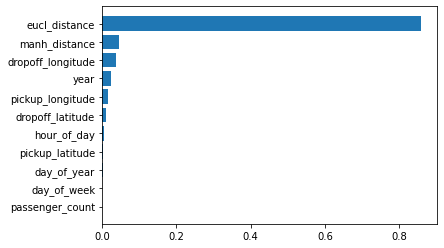

In [148]:
'''
This chart makes it clear which feature is the most important.
'''
plt.barh(features_sorted, feature_importances_sorted)

**Calculating the rooted mean squared error in the training database** **bold text**

In [151]:
mse = model.train_score_[-1]

In [152]:
mse

13.354031211329652

In [153]:
rmse = np.sqrt(mse)

In [154]:
rmse

3.654316791320869

**Calculating the rooted mean squared error in the test database**

In [155]:
y_pred = model.predict(X_test)

In [156]:
'''
Those are the answers for the fare prediction
'''
y_pred

array([ 8.33955994, 11.76764658,  8.89642242, ...,  6.41753151,
       10.42639211,  7.12977732])

In [157]:
'''
Those are the real fare prices
'''
y_test

201634     8.5
49065     10.5
101158     6.5
25912      6.1
124348     8.1
          ... 
107532     7.0
178791    14.5
121684     5.7
143553    12.0
145653     6.5
Name: fare_amount, Length: 48721, dtype: float32

**The values above are the predictions of the fare and the real fare. It's noticeable that the prediction prices are really close with the real prices. Below, we calculate the rooted mean squared error for the entire test database. The less the 'rmse', the better**




In [158]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

3.826681905538945

#**Automatic comparison between the fare predicted and the real fare**

In [159]:
'''
We are using the dataframe 'sample_size' that has 250 000 registers. We are gonna print every 250 bars. Otherwise
the graphics visualization would be decreased
'''
fig = plt.figure(figsize=(20, 5))
print_every = int(sample_size / 1000)
print_every

250

<Figure size 1440x360 with 0 Axes>

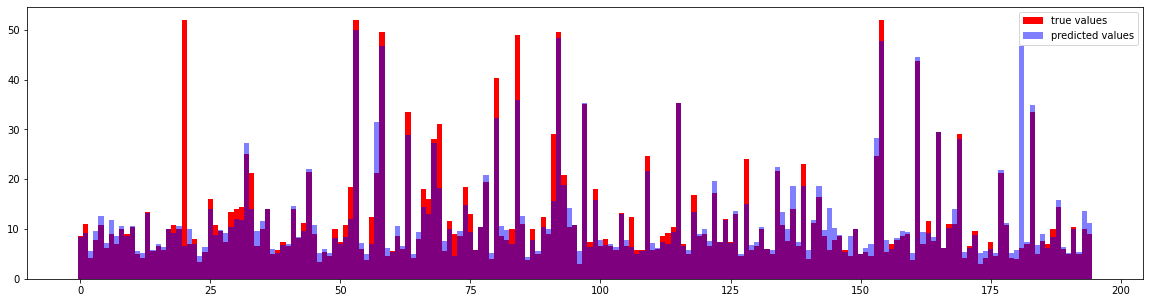

In [160]:
fig = plt.figure(figsize=(20,5))
'''
In the 'true_values' bar, we will have the real fare values.
'''
plt.bar(list(range(len(y_test[::print_every]))), y_test.values[::print_every],
        alpha = 1, color = 'red', width = 1, label = 'true values')

'''
In the 'predicted_values' bar, we will have the predicted fare values.
'''
plt.bar(list(range(len(y_pred[::print_every]))), y_pred[::print_every],
        alpha = 0.5, color = 'blue', width = 1, label = 'predicted values')
plt.legend()

#**Answering the challenge**

###**Instructions**

**Submission file:**

> For each key in the test set, you must predict a value for the fare_amount variable. The file should contain a header and have the following format:


>key,fare_amount

2015-01-27 13:08:24.0000002, 11.00





In [161]:
'''
Here we are using the test.csv file that was downloaded at the beggining from the challenge page and now it is being used to check the 
predictions. We are adding in the original test file a feature called 'key' in order to compare values with the same keys.
'''
test = pd.read_csv('test.csv',
                    parse_dates = ['pickup_datetime'],
                    dtype = {'fare_amount': np.float32,
                             'pickup_latitude': np.float32,
                             'pickup_longitude': np.float32,
                             'dropoff_latitude': np.float32,
                             'dropoff_longitude': np.float32,
                             'passenger_count': np.int32,
                             'key': str             
                    })

In [162]:
test.shape

(9914, 7)

In [163]:
key = test['key']

#**Preprocessing the test dataset**

**We need to make the same pre processing that it was made before to the
train dataset, to the test dataset. So we are just repeating the same process done before.**

In [164]:
# Data
pdt = test['pickup_datetime']
pdt = pdt.map(lambda date: date.tz_localize(None))
test.drop(['key'], axis = 1, inplace=True)
test['pickup_datetime'] = pdt

In [165]:
# New Attributes
test['day_of_week'] = test['pickup_datetime'].map(lambda date: date.timetuple().tm_wday)
test['day_of_year'] = test['pickup_datetime'].map(lambda date: date.timetuple().tm_yday)
test['year'] = test['pickup_datetime'].map(lambda date: date.timetuple().tm_year)
test['hour_of_day'] = test['pickup_datetime'].map(lambda date: date.timetuple().tm_hour)
test.drop('pickup_datetime', axis = 1, inplace = True)

# Distance
lon1, lon2 = np.radians(test['pickup_longitude']), np.radians(test['dropoff_longitude'])
lat1, lat2 = np.radians(test['pickup_latitude']), np.radians(test['dropoff_latitude'])
dlon = lon2 - lon1
dlat = lat2 - lat1

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
test['eucl_distance'] = 6373 * c

a1 = np.sin(dlon/2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1-a1))
a2 = np.sin(dlat/2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1-a2))
test['manh_distance'] = 6373 * (c1+c2)

In [166]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,day_of_year,year,hour_of_day,eucl_distance,manh_distance
0,-73.973320,40.763805,-73.981430,40.743835,1,1,27,2015,13,2.324087,3.123212
1,-73.986862,40.719383,-73.998886,40.739201,1,1,27,2015,13,2.426061,3.541439
2,-73.982521,40.751259,-73.979652,40.746140,1,5,281,2011,11,0.618597,0.888493
3,-73.981163,40.767807,-73.990448,40.751637,1,5,336,2012,21,1.961528,2.831859
4,-73.966049,40.789776,-73.988564,40.744427,1,5,336,2012,21,5.388903,7.548207


In [167]:
X_test = test
X_test_scaled = scaler.transform(X_test)

In [168]:
y_pred = model.predict(X_test_scaled)

In [169]:
y_pred

array([ 7.81949711,  8.01032537,  4.74255696, ..., 46.53711072,
       17.67953294,  5.54085545])

In [170]:
'''
To submit to the challenge, we need the features 'key' and the 'fare_amount' ( predicted values)
'''
submission = pd.DataFrame({'key': key, 'fare_amount': y_pred})

In [171]:
submission.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,7.819497
1,2015-01-27 13:08:24.0000003,8.010325
2,2011-10-08 11:53:44.0000002,4.742557
3,2012-12-01 21:12:12.0000002,7.182718
4,2012-12-01 21:12:12.0000003,12.949216


In [172]:
submission.to_csv('submission.csv', index = False)